In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def transData(data):
  X= data.iloc[:,1:]
  y= data.iloc[:,0]
  X= torch.tensor(X.values.astype(float))
  y= torch.tensor(y)
  return (X,y)

In [57]:
class NN(nn.Module):
  def __init__(self,input_dim,output_dim,learning_rate=0.01,epochs=100,hidden_units=4):
    super().__init__()
    self.fc_in= nn.Linear(input_dim,hidden_units)
    self.fc_out= nn.Linear(hidden_units,output_dim)

  def forward(self,x):
    batch_size= x.shape[0]
    x= x.view(batch_size,-1)
    H1= F.relu(self.fc_in(x))
    y_pred= self.fc_out(H1)
    return y_pred,H1


In [58]:
train_df= pd.read_csv('/content/largeTrain.csv',header=None)
val_df= pd.read_csv('/content/largeValidation.csv',header=None)

seed= 1234
np.random.seed(seed)
x= train_df.iloc[:,1:]
y= train_df.iloc[:,0]
input_dim= len(x.columns)
output_dim= len(pd.unique(y))
print(input_dim,output_dim)

train_df= transData(train_df)
val_df= transData(val_df)


batch=100
train_iterator = data.DataLoader(train_df,shuffle=True, batch_size=batch)
val_iterator= data.DataLoader(val_df,batch_size=batch)


128 10


In [59]:
def train(model,iterator,opt,crit,device):
  train_loss=0
  model.train()

  (x,y)= iterator
  x= x.to(device)
  y=y.to(device)
  opt.zero_grad()
  y_pred, _=model(x.float())
  loss= crit(y_pred,y)
  loss.backward()
  opt.step()
  train_loss += loss.item()
  return train_loss

def evaluate(model,data,crit,device):
  val_loss=0
  model.eval()
  with torch.no_grad():
    (x,y)=data
    x= x.to(device)
    y=y.to(device)
    y_pred, _=model(x.float())
    loss= crit(y_pred,y)
    val_loss+= loss.item()
  return val_loss

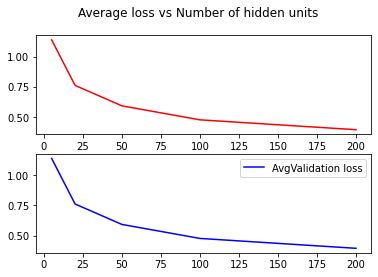

[1.139161660671234, 0.7614686116576195, 0.5920735321938991, 0.47598911583423614, 0.394084729552269]


In [76]:
#training
hidden= [5,20,50,100,200]
Loss_avg=[]
valLoss_avg=[]
for h in hidden:
  model= NN(input_dim,output_dim,hidden_units=h)
  optimizer= optim.Adam(model.parameters(),lr=0.01)
  criterion= nn.CrossEntropyLoss()
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model= model.to(device)
  criterion= criterion.to(device)
  train_loss=[]
  val_loss=[]
  
  for i in range(0,100):
    loss= train(model,train_df,optimizer,criterion,device)
    vloss= evaluate(model,val_df,criterion,device)
    train_loss.append(loss)
    val_loss.append(vloss)
  Loss_avg.append(sum(train_loss)/100)
  valLoss_avg.append(sum(val_loss)/100)
  """title= "Training and validation loss hidden: "+ str(h)
  plt.plot(train_loss,'b',label='Training')
  plt.plot(val_loss,'r',label='Validation')
  plt.title(title)
  plt.legend()
  plt.show()
"""
fig , (ax1,ax2)= plt.subplots(2)
fig.suptitle("Average loss vs Number of hidden units")
ax1.plot(hidden,Loss_avg,'r',label='AvgTraining loss')
ax2.plot(hidden,Loss_avg,'b',label='AvgValidation loss')

plt.legend()
plt.savefig('Avgloss.jpeg')
plt.show()

print(Loss_avg)


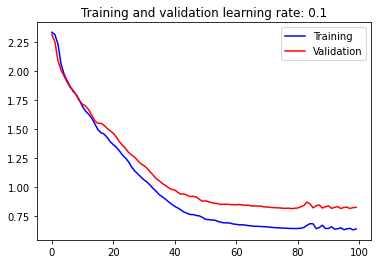

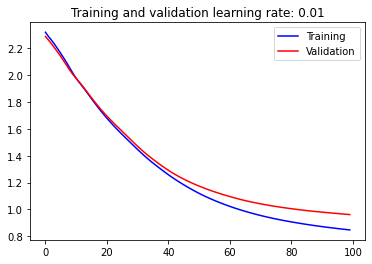

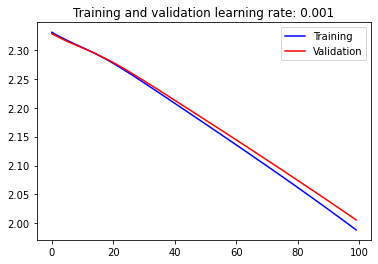

In [69]:
rate=[0.1,0.01,0.001]
for r in rate:
  model= NN(input_dim,output_dim,learning_rate=r)
  optimizer= optim.Adam(model.parameters(),lr=r)
  criterion= nn.CrossEntropyLoss()
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model= model.to(device)
  criterion= criterion.to(device)
  train_loss=[]
  val_loss=[]
  
  for i in range(0,100):
    loss= train(model,train_df,optimizer,criterion,device)
    vloss= evaluate(model,val_df,criterion,device)
    train_loss.append(loss)
    val_loss.append(vloss)
  Loss_avg.append(sum(train_loss)/100)
  title= "Training and validation learning rate: "+ str(r)
  plt.plot(train_loss,'b',label='Training')
  plt.plot(val_loss,'r',label='Validation')
  plt.title(title)
  plt.legend()
  plt.show()

